# Decision Tree with d1

This notebook is used to test if d1 is a viable data pre-processing method, which unfortunately as we find out, it is not.  

# Import libraries and read data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
# data = pd.read_csv("a1_b1_c2_d1.csv")
data = pd.read_csv("a1_b2_c2_d1.csv")
# data = pd.read_csv("a1_b1_c1_d1.csv")

# Train test split

In [8]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Predict with Decision Tree

Train Accuracy score: 0.94000
Train ROC score: 0.94754
Test Accuracy score: 0.90750
Test ROC score: 0.90706


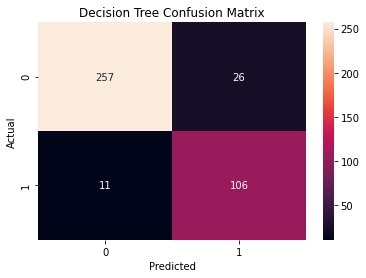

In [9]:
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state=1)
clf.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = clf.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = clf.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse = confusion_matrix(y_test, y_pred_test)
confuse
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

No noticeable improvement in results

In [6]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier() 

# Define hyperparameters and grid search
param_grid = { 
    'criterion': ['gini','entropy'],
    'max_depth' : [1,2,3,4,5]

}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

CPU times: user 232 ms, sys: 8.68 ms, total: 241 ms
Wall time: 249 ms


# GridSearchCV

In [7]:
# get best score
grid_search.best_score_

0.9800000000000001

In [8]:
# get best parameters
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [9]:
# store search results in dataframe
df = pd.DataFrame(grid_search.cv_results_)
df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001434,0.000710,0.000475,0.000230,gini,1,"{'criterion': 'gini', 'max_depth': 1}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
1,0.000924,0.000012,0.000336,0.000038,gini,2,"{'criterion': 'gini', 'max_depth': 2}",1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.9,1.0,0.97,0.045826,7
2,0.001046,0.000134,0.000378,0.000100,gini,3,"{'criterion': 'gini', 'max_depth': 3}",1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.8,1.0,0.96,0.066332,8
3,0.000991,0.000071,0.000339,0.000016,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.8,1.0,0.96,0.066332,8
4,0.001080,0.000237,0.000372,0.000088,gini,5,"{'criterion': 'gini', 'max_depth': 5}",1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.9,0.8,1.0,0.96,0.066332,8
5,0.000953,0.000037,0.000330,0.000011,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
6,0.000977,0.000036,0.000337,0.000021,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,0.98,0.040000,1
7,0.001056,0.000138,0.000373,0.000084,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,4
8,0.001038,0.000189,0.000336,0.000015,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,4
9,0.000984,0.000019,0.000336,0.000012,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,1.0,0.97,0.064031,4


In [ ]:
# store search results to csv
df.to_csv('DT_cv_result.csv')